# Oppgave 2.2 løsningsforslag

Denne oppgaven dreier seg om å konsekvensen for levede organismer som blir behandlet med rotenon. Dataene er gitt i oppgaven og vi skal finne probit koeffisientene basert på den gitte statistikken.
<bt> 
Først skal vi plotte sansynligheten mot logaritmen av dosen og etterpå skal vi konvertene sansynligheten til probit og finne koeffisientene.
<bt> 
Først git vi dataene


In [23]:
import numpy as np
import pandas as pd

Dose = np.array([10.2, 7.7, 5.1, 3.8, 2.6, 0])

# Så gir vi sansynligheten

P = np.array([44/50, 42/49, 24/46, 16/48, 6/50, 0/49])
P = P*100

"""
her kommer noen snippetriks for å vise en tabell
"""

d = {'Dose': Dose, 'Sansynlighet': P}
df = pd.DataFrame(data=d)
df.round({'Dose': 1, 'Sansynlighet': 1})


,Dose,Sansynlighet
0,10.2,88.0
1,7.7,85.7
2,5.1,52.2
3,3.8,33.3
4,2.6,12.0
5,0.0,0.0


Nå kan vi plotte dataene i et plot

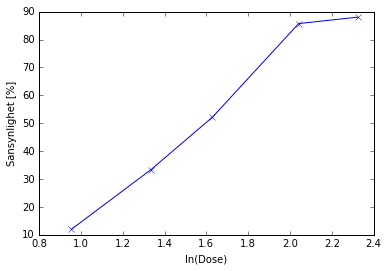

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.log(Dose),P,'b-x');
plt.xlabel('ln(Dose)');
plt.ylabel('Sansynlighet [%]');

Nå må vi gjøre om verdiene for sansynlighet til probit verdier. Da henter vi inn funksjonen fra tidligere. Ser også at dataene kan tilpasses en rett linje. Det er jo bra, siden det er hele ideen med å bruke probit.


In [71]:
def Prob2Probit(P):
    """
    Denne funksjonen beregner probitverdien som korresponderer med en gitt
    sansynlighet
    """
    
    def Prob0(Y,P) :
        """
        Denne funksjonen brukes til å regne ut probitverdien i funksjonen nedenfor
        """
        import numpy as np
        import math
        
        Pcalc = 50.0*(1 + math.erf((Y-5)/np.sqrt(2)) ) - P
        return Pcalc    
    
    a, b = 0, 9
    app = 0.001
    Fa, Fb = Prob0(a,P), Prob0(b,P)
    if Fa * Fb > 0:
     raise Exception('No change of sign - bisection not possible')   
    while( b - a > app ): 
     x = ( a + b ) / 2.0
     f = Prob0(x,P)
     if f * Fa > 0: a = x
     else: b = x  

    return x

Når vi har kjørt den forrige cellen så har vi funksjonen klar til å brukes. Da er det bare å gå i gang med å bruke den.

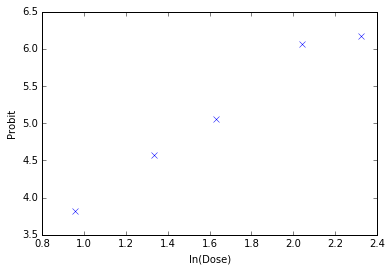

In [72]:
# Lager først en array vi kan putte probitverdiene i
pb = np.zeros(len(P))

for i in range (0, len(pb)-1):
    pb[i] = Prob2Probit(P[i])

"""
da har vi probitverdiene i en array pb
da kan vi fortsette og plotte 
"""

plt.plot(np.log(Dose),pb,'bx');
plt.xlabel('ln(Dose)');
plt.ylabel('Probit');

Ser nå at vi trenger en fin måte og tilpasse en rett linje til disse dataene. Da husker vi at det finnes en metode som heter minste kvadraters metode som kan brukes. Jeg vil heller gå til google og søke på: "numpy fit line" så dukker numpy.polyfit opp. Den forsøker jeg meg med. Jeg leser dokumentasjonen og kopiere fra eksempelet. 
<bt>
Etter litt prøving og feiling så ser jeg at det er et problem å tilpasse dataene til dose=0 og sansynlighet = 0. Derfor tar jeg de vekk når jeg kurvetilpasser.


[ 1.81426657  2.13255077]


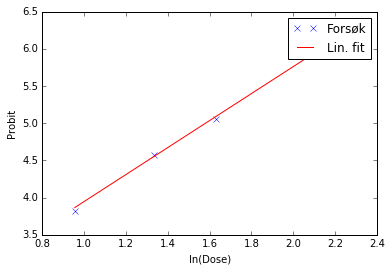

In [73]:
z = np.polyfit(np.log(Dose[0:5]), pb[0:5], 1)
z
# her er z en array med koeffisientene til en rett linje. Den andre er konstanten mens den første er lieær koeffisienten
# Hvis det hadde vært på formen y = ax + b så hadde array z vært z = [a,b]

fit = z[1]+z[0]*np.log(Dose)
print(z)

plt.plot(np.log(Dose),pb,'bx');
plt.plot(np.log(Dose),fit,'r-');
plt.xlabel('ln(Dose)');
plt.ylabel('Probit');
plt.legend(('Forsøk','Lin. fit'));

Når vi nå har kurvetilpasset dataene så ser vi at det er lett å fremstille dataene på kjent måte.

\begin{align}
Y = k_1 + k_2 \cdot ln(V)\\
k_1 = 1.81 \\
k_2 = 2.13
\end{align}